# Supply Chain Shipment Pricing Data - Data Analysis and Modeling

Dataset URL - https://www.kaggle.com/divyeshardeshana/supply-chain-shipment-pricing-data

# Data Loading and Understanding

In [21]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
DataSet = pd.read_csv("data/SCMS_Delivery_History_Dataset.csv")

In [24]:
# Take a first look
DataSet.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [25]:
TotalRowCount = len(DataSet)
print("Total Number of Data Count :", TotalRowCount)

Total Number of Data Count : 10324


In [26]:
# check our datatypes
DataSet.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [27]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [28]:
# total no of unique values in each columns
DataSet.nunique()

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

In [29]:
# Total null values in each column
DataSet.isna().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

### Let's see the top 10 countries in this dataset

In [30]:
DataSet = DataSet.dropna()
total_by_country = DataSet["Country"].value_counts().to_frame().reset_index().head(10)
print("Top 10 Countries Wise Count")
total_by_country

Top 10 Countries Wise Count


,Country,count
0,South Africa,1364
1,Nigeria,952
2,Côte d'Ivoire,827
3,Uganda,724
4,Vietnam,661
5,Haiti,549
6,Mozambique,506
7,Zimbabwe,471
8,Zambia,470
9,Tanzania,374


### Now let's visualize it

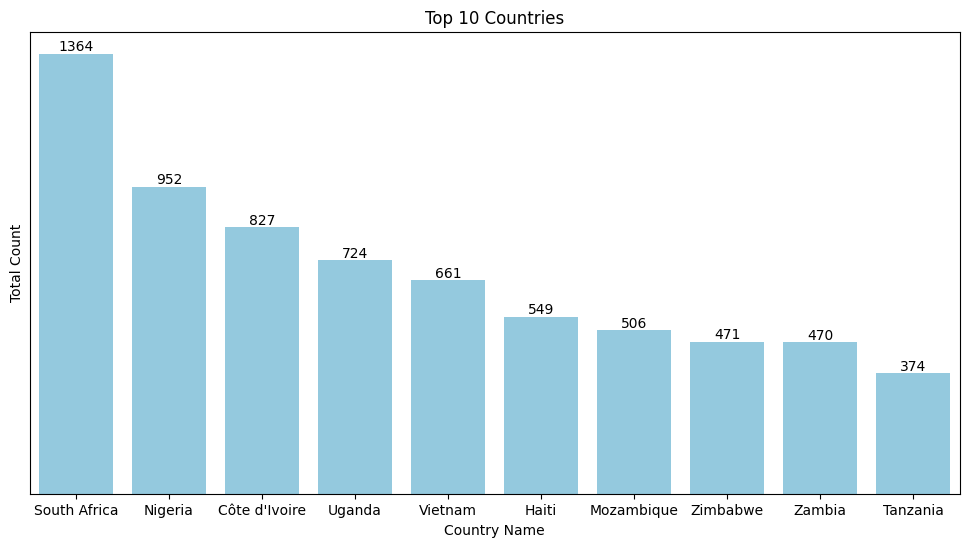

In [31]:
plt.figure(figsize=(12,6))
sn.barplot(data=total_by_country, order = total_by_country["Country"], x="Country", y="count", color="skyblue")
plt.title('Top 10 Countries')
plt.ylabel('Total Count')
plt.xlabel('Country Name')
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.yticks([],[])
plt.show()

## Let's see the average "Delivery_Delay" for each country

In [32]:
# We change the data type to datetime
DataSet['Scheduled Delivery Date']  = pd.to_datetime(DataSet['Scheduled Delivery Date']) 
DataSet['Delivered to Client Date']  = pd.to_datetime(DataSet['Delivered to Client Date']) 
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8158 entries, 21 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            8158 non-null   int64         
 1   Project Code                  8158 non-null   object        
 2   PQ #                          8158 non-null   object        
 3   PO / SO #                     8158 non-null   object        
 4   ASN/DN #                      8158 non-null   object        
 5   Country                       8158 non-null   object        
 6   Managed By                    8158 non-null   object        
 7   Fulfill Via                   8158 non-null   object        
 8   Vendor INCO Term              8158 non-null   object        
 9   Shipment Mode                 8158 non-null   object        
 10  PQ First Sent to Client Date  8158 non-null   object        
 11  PO Sent to Vendor Date        815

In [33]:
# We add the column "Delivery Delay"
DataSet['Delivery_Delay'] = DataSet['Delivered to Client Date'] - DataSet['Scheduled Delivery Date']
DataSet['Delivery_Delay'] = DataSet['Delivery_Delay'].dt.days
DataSet['Delivery_Delay']

21        0
22        0
23        0
29        0
32        0
         ..
10319   -16
10320     6
10321    -6
10322   -36
10323   -27
Name: Delivery_Delay, Length: 8158, dtype: int64

In [34]:
Delivery_Delay_by_country = DataSet.groupby('Country')['Delivery_Delay'].mean().sort_values(ascending = False).reset_index()
Delivery_Delay_by_country['Delivery_Delay'] = round(Delivery_Delay_by_country['Delivery_Delay'],2)
Delivery_Delay_by_country

,Country,Delivery_Delay
0,"Congo, DRC",15.28
1,Togo,5.33
2,Benin,3.70
3,Senegal,1.50
4,Botswana,0.67
5,Afghanistan,0.00
6,Malawi,0.00
7,Angola,0.00
8,Lebanon,0.00
9,Burkina Faso,0.00


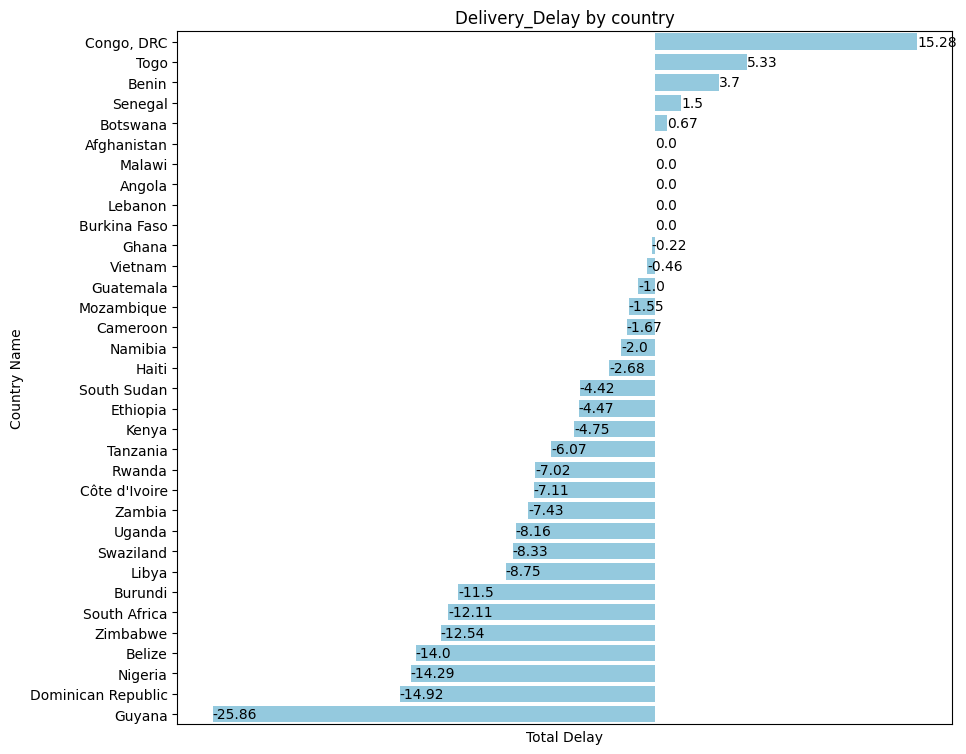

In [35]:
plt.figure(figsize=(10,9))
sn.barplot(data=Delivery_Delay_by_country , order = Delivery_Delay_by_country ["Country"], y="Country", x="Delivery_Delay", color="skyblue")
plt.title('Delivery_Delay by country')
plt.xlabel('Total Delay')
plt.ylabel('Country Name')

for index, value in enumerate(Delivery_Delay_by_country["Delivery_Delay"]):
    plt.text(value, index, str(value), ha='left', va='center')

plt.xticks([],[])

plt.show()

### Total Pack Price for Top 15 Countries

In [36]:
total_pack_price_by_country = DataSet.groupby(['Country'])['Pack Price'].sum().to_frame().reset_index().head(15)
total_pack_price_by_country['Pack Price'] = round(total_pack_price_by_country['Pack Price'],2)
total_pack_price_by_country

,Country,Pack Price
0,Afghanistan,111.55
1,Angola,45.56
2,Belize,2.10
3,Benin,95.48
4,Botswana,31.29
5,Burkina Faso,8.85
6,Burundi,605.81
7,Cameroon,421.43
8,"Congo, DRC",2148.15
9,Côte d'Ivoire,10174.96


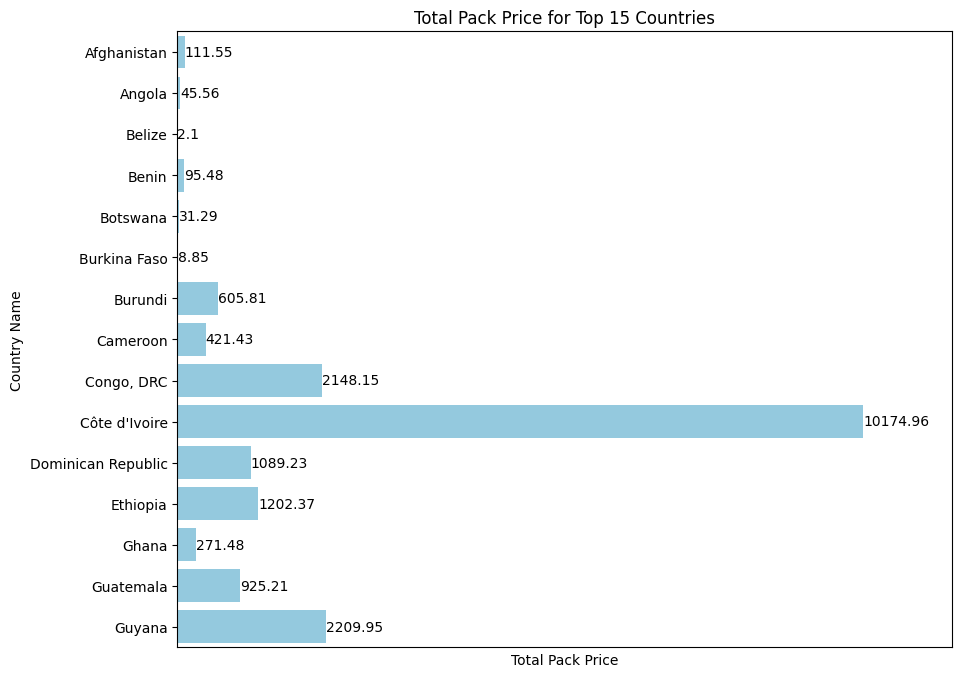

In [37]:
plt.figure(figsize=(10,8))
sn.barplot(data=total_pack_price_by_country , order = total_pack_price_by_country["Country"], y="Country", x="Pack Price", color="skyblue")
plt.title('Total Pack Price for Top 15 Countries')
plt.xlabel('Total Pack Price')
plt.ylabel('Country Name')

for index, value in enumerate(total_pack_price_by_country["Pack Price"]):
    plt.text(value, index, str(value), ha='left', va='center')

plt.xticks([],[])
plt.xlim((0,11500))

plt.show()

### Shipment Mode 

In [38]:
ShippingMode = DataSet["Shipment Mode"].value_counts().to_frame().reset_index()
ShippingMode["Porcentaje"] = round(ShippingMode["count"]/ShippingMode['count'].sum()*100,2)
ShippingMode

,Shipment Mode,count,Porcentaje
0,Air,4361,53.46
1,Truck,2780,34.08
2,Air Charter,650,7.97
3,Ocean,367,4.50


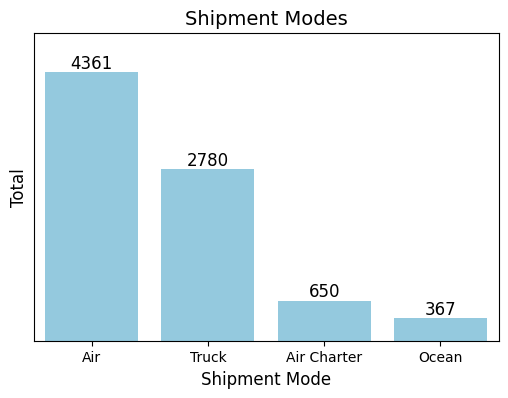

In [39]:
plt.figure(figsize=(6, 4))
# Suponiendo que ShippingMode es tu DataFrame
sns.barplot(data=ShippingMode, order=ShippingMode["Shipment Mode"], x="Shipment Mode", y="count", color="skyblue")
plt.title('Shipment Modes', fontsize=14)
plt.ylabel('Total', fontsize=12)
plt.xlabel('Shipment Mode', fontsize=12)

for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', fontsize=12)

plt.yticks([], [])
plt.xticks(fontsize=10)
plt.ylim((0, 5000))
plt.show()


### Weight (Kilograms) by ship mode

In [40]:
DataSet["Weight (Kilograms)"] = pd.to_numeric(DataSet["Weight (Kilograms)"], errors="coerce")

In [41]:
DataSet["Weight (Kilograms)"].describe()

count      4742.000000
mean       3894.743779
std        7908.387286
min           1.000000
25%         259.000000
50%        1311.500000
75%        4255.000000
max      154780.000000
Name: Weight (Kilograms), dtype: float64

In [42]:
DataSet["Weight (Kilograms)"].isna().sum()

3416

In [43]:
Dataset_weight_without_null = DataSet.dropna()

In [44]:
Dataset_weight_without_null[Dataset_weight_without_null['Weight (Kilograms)']>100000]

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Delivery_Delay
4922,52999,104-CI-T30,FPQ-5022,SCMS-64530,ASN-6101,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,1461,29950.50,20.50,0.68,"Aurobindo Unit III, India",Yes,154780.0,1664.12,64.57,0
7441,83304,111-MZ-T30,FPQ-14843,SO-49710,DN-4096,Mozambique,PMO - US,From RDC,N/A - From RDC,Truck,...,15654,152783.04,9.76,0.33,Hetero Unit III Hyderabad IN,Yes,112027.0,79514.44,157.06,13


In [45]:
Dataset_weight_without_null_less_10000 = Dataset_weight_without_null[Dataset_weight_without_null['Weight (Kilograms)']<10000]

In [46]:
plt.figure(figsize=(8,6))
px.histogram(data_frame=Dataset_weight_without_null_less_10000, x="Weight (Kilograms)", color="Shipment Mode")

<Figure size 800x600 with 0 Axes>

# 3. Manufacturing Site Visualizations 
Top 10 Manufacturing Site for all Shipment Mode

In [47]:
TopTenManufacturingSite = DataSet['Manufacturing Site'].value_counts().to_frame().reset_index().head(10)
TopTenManufacturingSite


,Manufacturing Site,count
0,"Aurobindo Unit III, India",2978
1,Mylan (formerly Matrix) Nashik,1407
2,Hetero Unit III Hyderabad IN,868
3,"Cipla, Goa, India",624
4,"Strides, Bangalore, India.",528
5,ABBVIE Ludwigshafen Germany,350
6,ABBVIE (Abbott) Logis. UK,204
7,"BMS Meymac, France",129
8,"Aspen-OSD, Port Elizabeth, SA",125
9,"MSD, Haarlem, NL",117


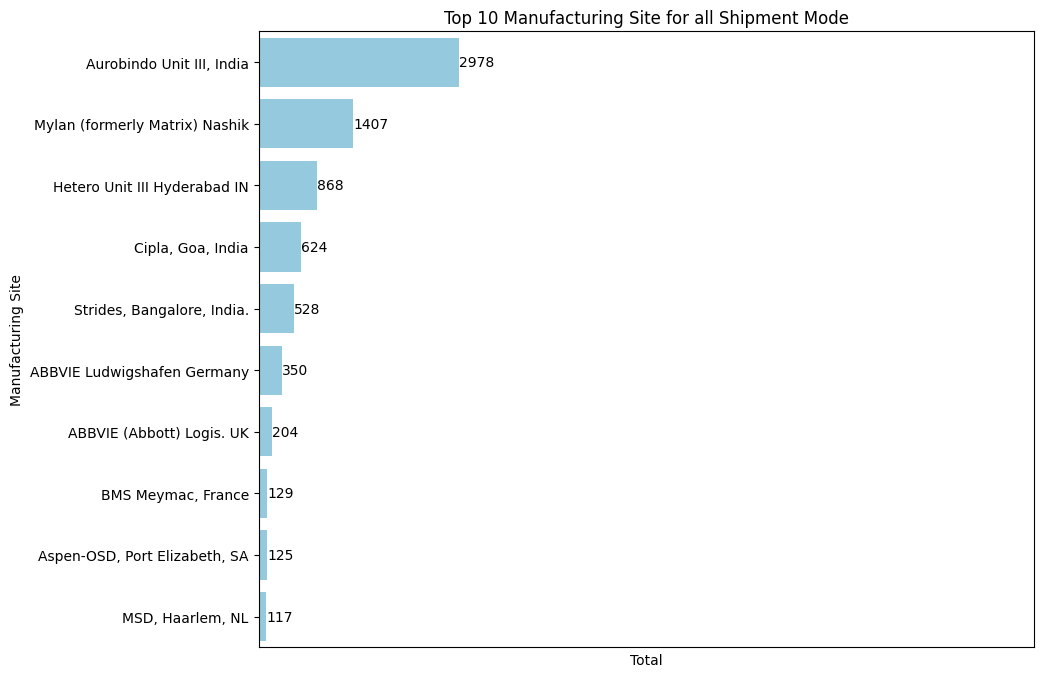

In [48]:
plt.figure(figsize=(10,8))
sn.barplot(data=TopTenManufacturingSite, order = TopTenManufacturingSite["Manufacturing Site"], y="Manufacturing Site", x="count", color="skyblue")
plt.title('Top 10 Manufacturing Site for all Shipment Mode')
plt.xlabel('Total')
plt.ylabel('Manufacturing Site')

for index, value in enumerate(TopTenManufacturingSite["count"]):
    plt.text(value, index, str(value), ha='left', va='center')

plt.xticks([],[])
plt.xlim((0,11500))

plt.show()

### Top 10 Manufacturing Site for Air Shipment Mode

In [49]:
# Top 10 Air Shipment Mode in Bar Chart
ItemData = DataSet[DataSet['Shipment Mode']=='Air']

TopTenManufacturingSite_by_air = ItemData['Manufacturing Site'].value_counts().to_frame().reset_index().head(10)
TopTenManufacturingSite_by_air

,Manufacturing Site,count
0,"Aurobindo Unit III, India",1641
1,Mylan (formerly Matrix) Nashik,695
2,Hetero Unit III Hyderabad IN,417
3,ABBVIE Ludwigshafen Germany,281
4,"Cipla, Goa, India",264
5,"Strides, Bangalore, India.",251
6,ABBVIE (Abbott) Logis. UK,147
7,"MSD, Haarlem, NL",90
8,"BMS Meymac, France",83
9,"Aspen-OSD, Port Elizabeth, SA",80


(0.0, 11500.0)

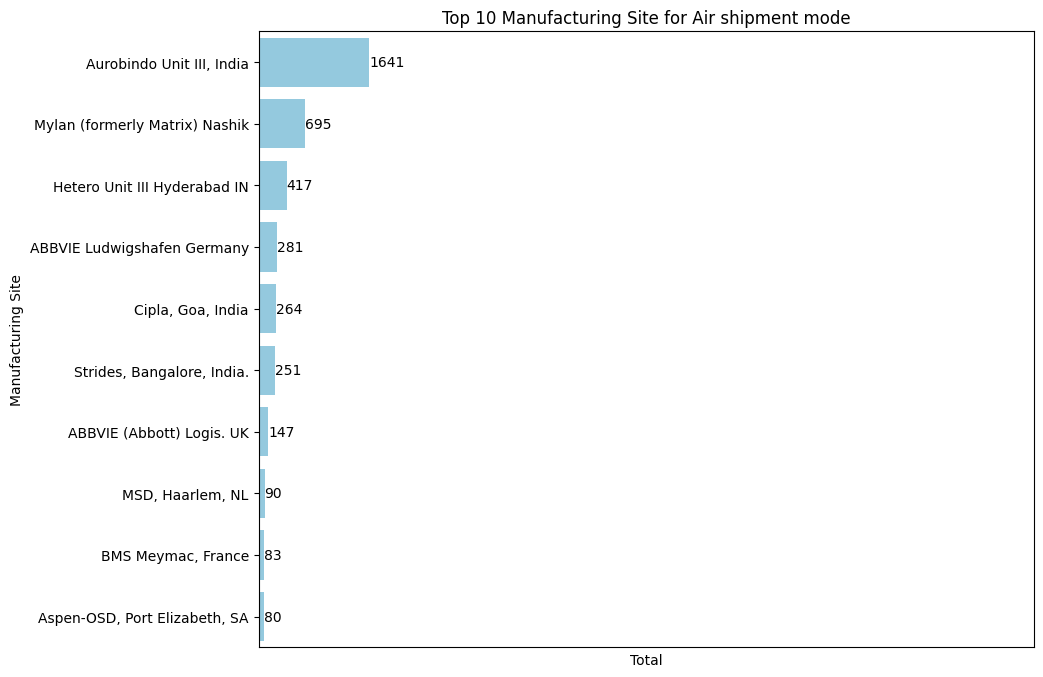

In [50]:
plt.figure(figsize=(10,8))
sn.barplot(data=TopTenManufacturingSite_by_air, order = TopTenManufacturingSite_by_air["Manufacturing Site"], y="Manufacturing Site", x="count", color="skyblue")
plt.title('Top 10 Manufacturing Site for Air shipment mode')
plt.xlabel('Total')
plt.ylabel('Manufacturing Site')

for index, value in enumerate(TopTenManufacturingSite_by_air["count"]):
    plt.text(value, index, str(value), ha='left', va='center')

plt.xticks([],[])
plt.xlim((0,11500))

### Average Pack Price by Shipment Mode and 

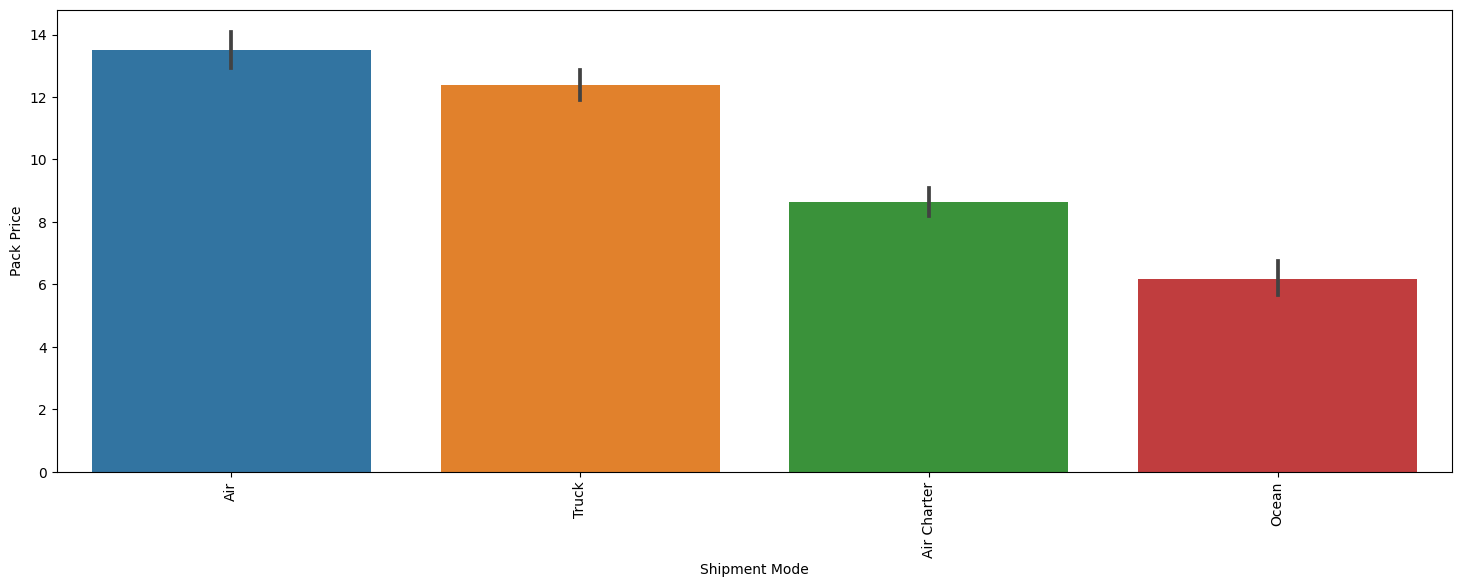

In [51]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sn.barplot(data=DataSet, x='Shipment Mode',y='Pack Price')
plt.show()

### Average Freight Cost (USD) by Shipment Mode

In [52]:
DataSet["Freight Cost (USD)"] = pd.to_numeric(DataSet["Freight Cost (USD)"], errors="coerce")

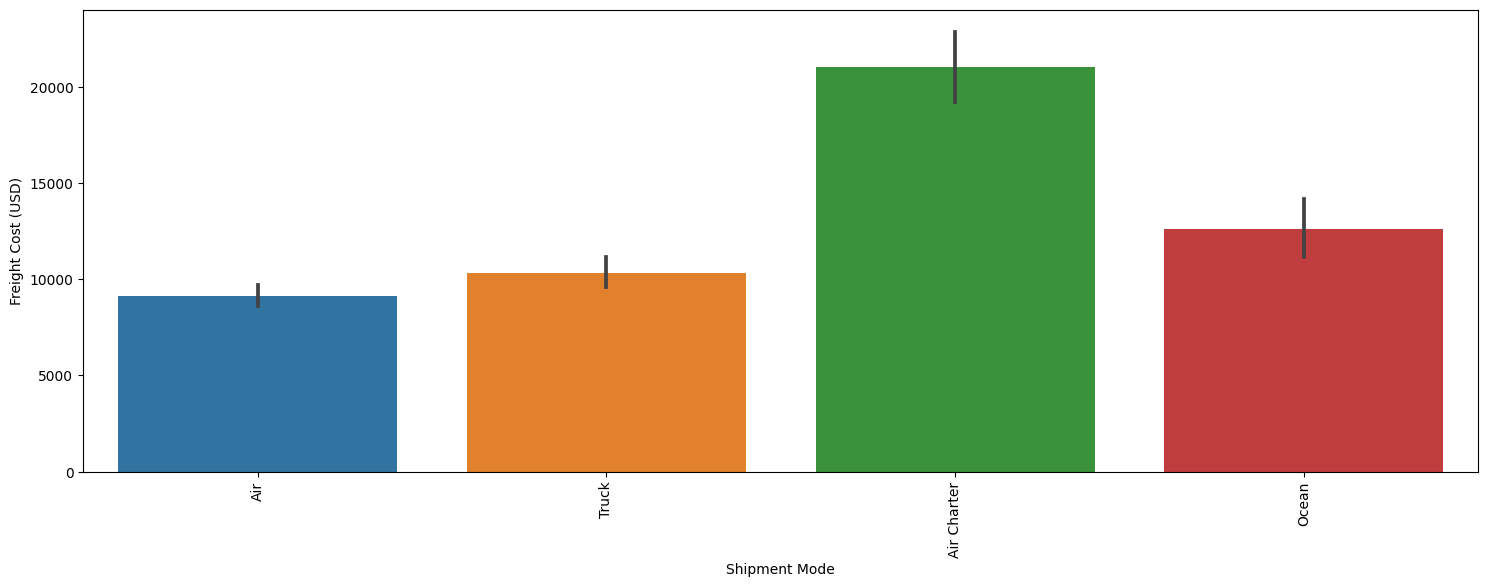

In [53]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sn.barplot(data=DataSet, x='Shipment Mode', y='Freight Cost (USD)')
plt.show()

### Acerage Delivery_Delay by Shipment Mode

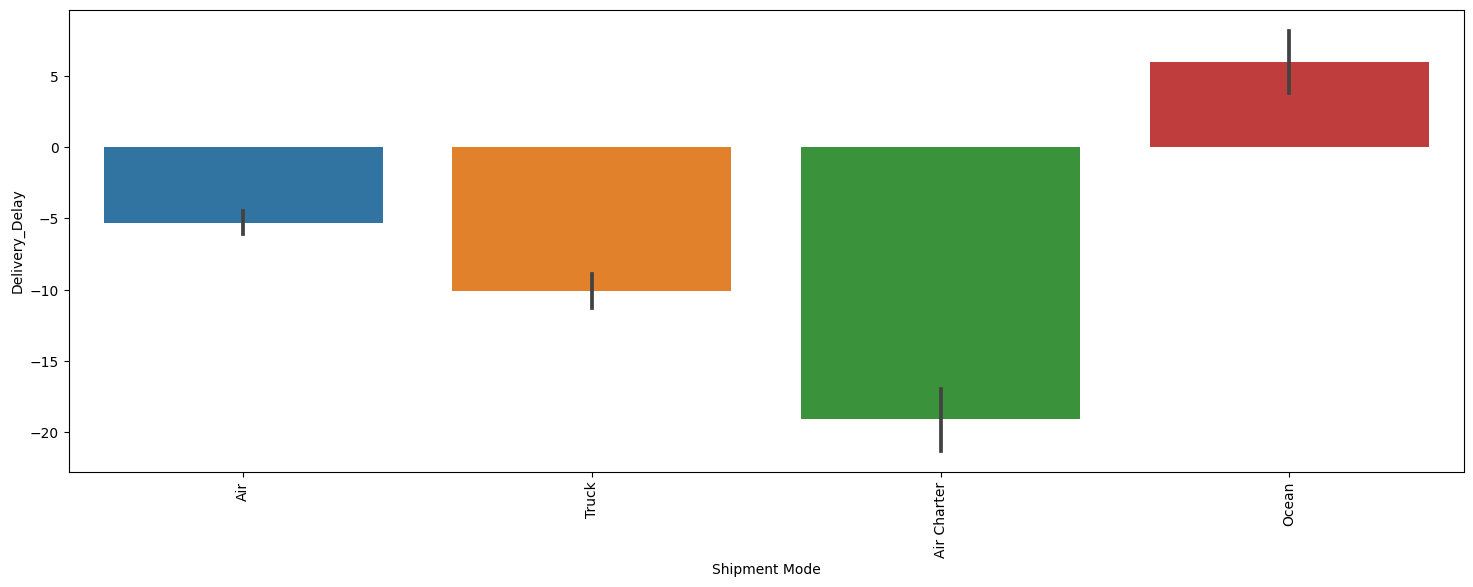

In [54]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sn.barplot(data=DataSet, x='Shipment Mode', y='Delivery_Delay')
plt.show()